<a href="https://colab.research.google.com/github/Sirabhop/Preclinical-AD-EEG-classification/blob/master/EEG_Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install mne

In [0]:
import mne
import os

from google.colab import drive
drive.mount('/content/drive')

#**1) Import Data**

In [31]:
os.chdir('/content/drive/My Drive/EEG Data')

eog_chs = ('Leye','Reye','UBlink','DBlink','LMast','RMast')
exclude_chs = ('EXG7','EXG8','GSR1','GSR2','Erg1','Erg2','Resp','Plet','Temp') 
chn_names = ['Fp1','AF3','F7','F3','FC1','FC5','T7','C3','CP1','CP5','P7','P3',
               'Pz','PO3','O1','Oz','O2','PO4','P4','P8','CP6','CP2','C4','T8',
               'FC6','FC2','F4','F8','AF4','Fp2','Fz','Cz']

raw = mne.io.read_raw_bdf('SS8.bdf', exclude = exclude_chs, eog = eog_chs, stim_channel = 'Status', preload = True)

Extracting EDF parameters from /content/drive/.shortcut-targets-by-id/12z4LP3ZseBTu5H_CzdffptpTFzogZTMp/EEG Data/SS8.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4790271  =      0.000 ...  2339.000 secs...


#**2) Band-pass filter**

In [32]:
raw.filter(l_freq = 0.5, h_freq = 45)
raw.notch_filter(freqs = (50, 100))

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 13517 samples (6.600 sec)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 13517 samples (6.600 sec)



<RawEDF | SS8.bdf, 39 x 4790272 (2339.0 s), ~1.39 GB, data loaded>

#**3) Import channel locations**

In [33]:
raw.set_montage('biosemi32')

<RawEDF | SS8.bdf, 39 x 4790272 (2339.0 s), ~1.39 GB, data loaded>

#**4) Apply EOG Projection**

In [43]:
eog_projs, _ = mne.preprocessing.compute_proj_eog(raw, n_eeg = 1, reject=None, no_proj=True)
raw.add_proj(eog_projs).apply_proj()

Running EOG SSP computation
EOG channel index for this subject is: [32 33 34 35 36 37]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 32768 samples (16.000 sec)

Now detecting blinks and generating corresponding events
Found 92 significant peaks
Number of EOG events detected : 92
Computing projector
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 35 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass f

<RawEDF | SS8.bdf, 39 x 4790272 (2339.0 s), ~1.39 GB, data loaded>

#**4) Epoch data**

In [134]:
events = mne.find_events(raw, stim_channel='Status')
epoch = mne.Epochs(raw, events, preload = True)

Trigger channel has a non-zero initial value of 65540 (consider using initial_event=True to detect this event)
14 events found
Event IDs: [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15]
14 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 14 events and 1435 original time points ...
0 bad epochs dropped


In [133]:
epoch_2 = mne.Epochs(raw, events, event_id = [2,3,4,5,6], preload = True)

5 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Loading data for 5 events and 1435 original time points ...
0 bad epochs dropped


In [0]:
evoked = epoch.average()

In [0]:
import numpy as np

In [0]:
evoked.plot_topomap(times=np.linspace(10,20, 10))

    Using multitaper spectrum estimation with 7 DPSS windows


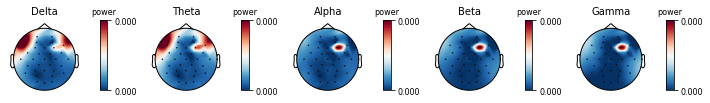

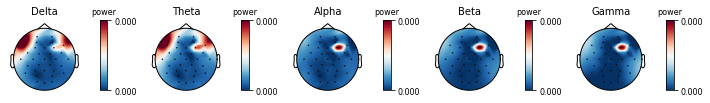

In [135]:
mne.viz.plot_epochs_psd_topomap(epoch, tmin = 0, tmax = 1000)

    Using multitaper spectrum estimation with 7 DPSS windows


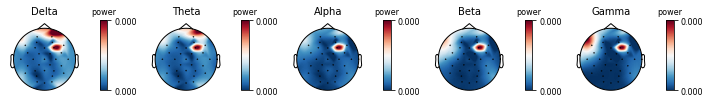

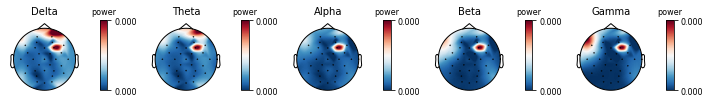

In [136]:
mne.viz.plot_epochs_psd_topomap(epoch_2, tmin = 0, tmax = 1000)

    Using multitaper spectrum estimation with 7 DPSS windows


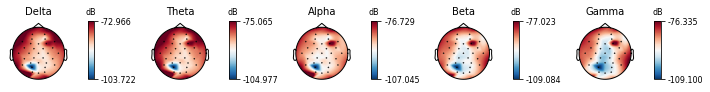

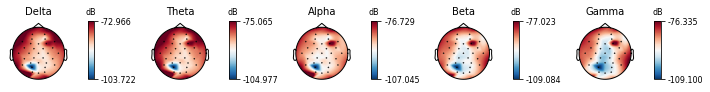

In [108]:
epoch.plot_psd_topomap(tmin = 0, tmax = 1000)